In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import autoreload
import evotsc
autoreload.reload(evotsc)

<module 'evotsc' from '/Users/theotime/Work/Code/EvoTSC/evotsc.py'>

In [3]:
# Population-level constants
genome_size = 10_000
gene_length = 100
intergene = 900
interaction_dist = 2500

In [4]:
def plot_expr(temporal_expr, fitness, plot_name):
    nb_genes, nb_steps = temporal_expr.shape
    
    #colormap = mpl.cm.get_cmap('viridis', nb_genes)(range(nb_genes))
    
    plt.figure(figsize=(9, 6), dpi=200)
    
    for gene in range(nb_genes):
        linestyle = 'solid' if genes[gene].orientation == 0 else 'dashed'
        plt.plot(temporal_expr[gene, :],
                 linestyle=linestyle,
                 #color=colormap[gene],
                 label=f'Gene {gene}')
    
    plt.grid(linestyle=':')
    plt.xlabel('Time', fontsize='large')
    plt.ylabel('Expression level', fontsize='large')
    
    plt.legend(loc='center right')
    plt.title(f'Fitness: {fitness:.2}')
        
    plt.savefig(plot_name, dpi=300, bbox_inches='tight')

In [5]:
def switch_1_gene(individual): # Evaluate all the individuals obtained by switching 1 gene of the given individual
    for i_switched_gene in range(len(genes)):
        # Switch the current gene 
        to_switch = individual.genes[i_switched_gene]
        to_switch.orientation = 1 - to_switch.orientation

        # Run the switched system and plot
        switch_res, switch_fit = individual.evaluate()
        print(f'Switched gene {i_switched_gene}, fitness: {switch_fit}')
        plot_expr(switch_res, switch_fit, f'switched_{i_switched_gene}')

        # Reset the gene to its former orientation
        to_switch.orientation = 1 - to_switch.orientation

In [6]:
genes = evotsc.Gene.generate(gene_length=gene_length, intergene=intergene, nb_genes=10)

In [7]:
init_indiv = evotsc.Individual(genes=genes, interaction_dist=interaction_dist, nb_eval_steps=16)

In [8]:
mutation = evotsc.Mutation(intergene_mutation_prob=0.1, intergene_mutation_var=50)

In [9]:
population = evotsc.Population(init_indiv=init_indiv, nb_indivs=1000, mutation=mutation)

In [10]:
population.evaluate()

In [11]:
np.mean([indiv.fitness for indiv in population.individuals])

8.756510762696521e-27

In [12]:
population.evolve(nb_steps=100)

Time 0: avg fit 8.756510762696521e-27
Time 10: avg fit 8.756510762696521e-27
Time 20: avg fit 8.756510762696521e-27
Time 30: avg fit 8.756510762696521e-27
Time 40: avg fit 8.756510762696521e-27
Time 50: avg fit 8.756510762696521e-27
Time 60: avg fit 8.756510762696521e-27
Time 70: avg fit 8.756510762696521e-27
Time 80: avg fit 8.756510762696521e-27
Time 90: avg fit 8.756510762696521e-27


In [14]:
best_indivs = population.best_indivs

In [15]:
orig_expr, orig_fit = best_indivs[0].evaluate()

In [16]:
final_expr, final_fit = best_indivs[-1].evaluate()

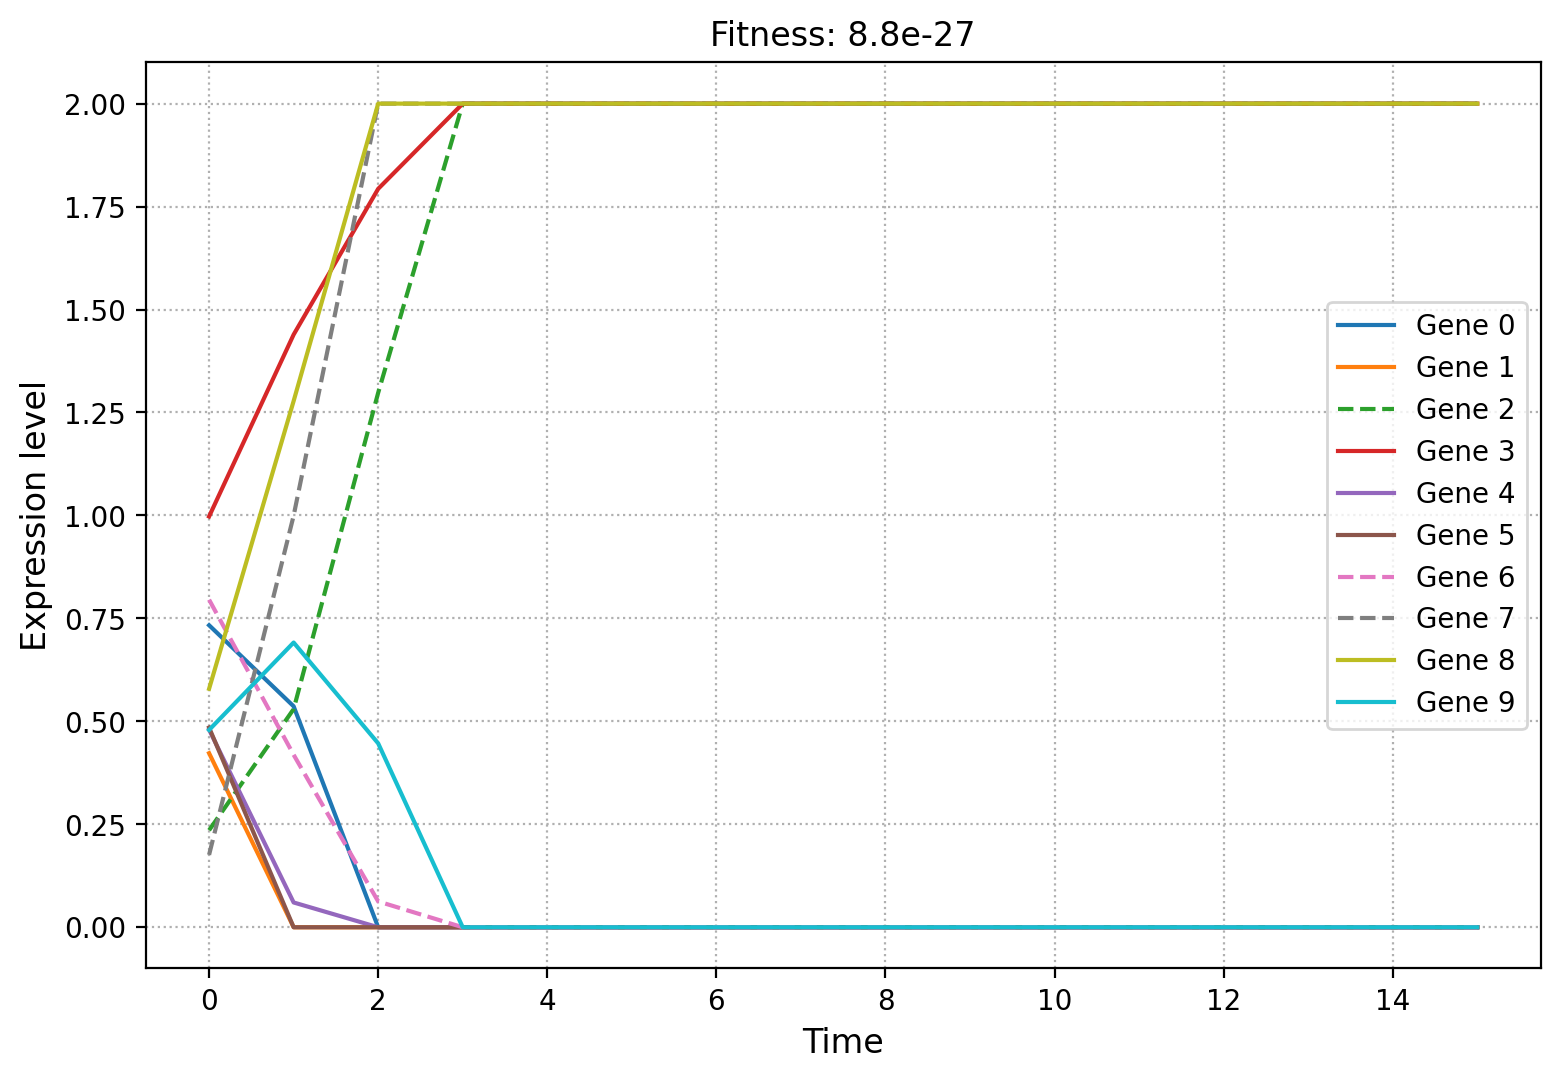

In [17]:
plot_expr(orig_expr, orig_fit, 'original individual')

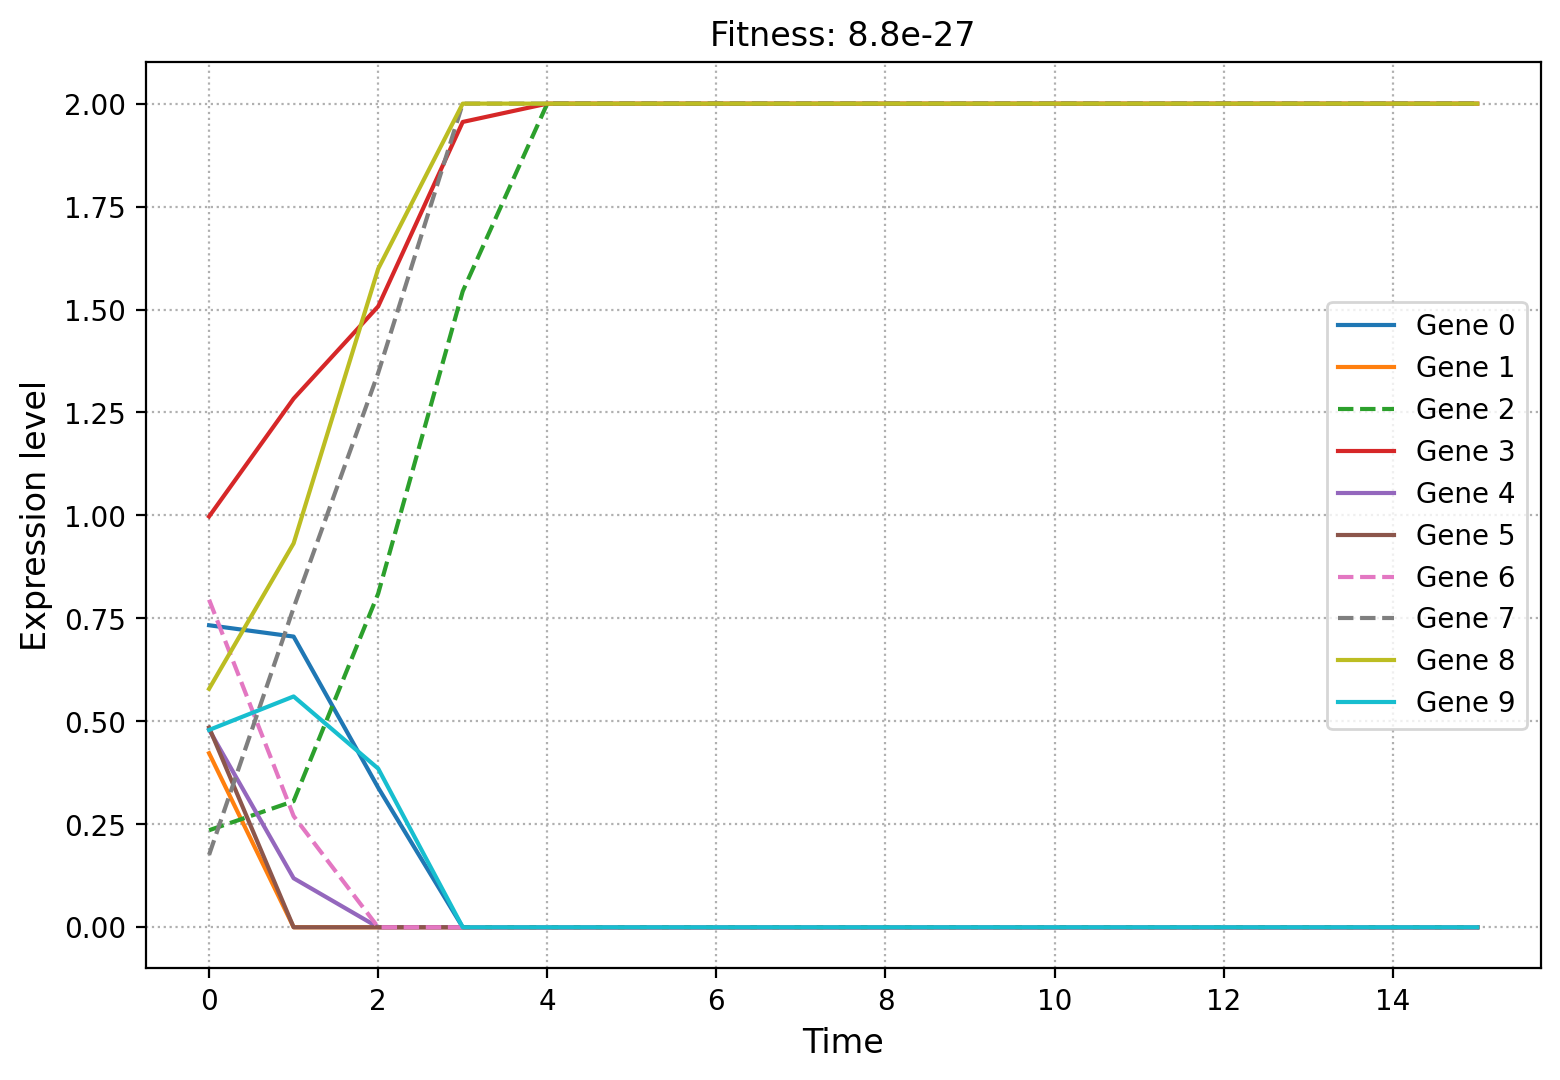

In [18]:
plot_expr(final_expr, final_fit, 'final individual')